<a href="https://colab.research.google.com/github/NavinduDahanayakeOfficial/b20_Group26/blob/main/driving_pattern_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
# Load dataset
df = pd.read_csv("synthetic_obd2_data.csv")

In [6]:
# Selecting features for clustering
features = ['RPM', 'Speed_kmh', 'Intake_Pressure_kPa', 'Fuel_Level_Percent']
X = df[features]


In [7]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled

array([[-0.81062172, -0.22491078,  0.19959828, -1.24866928],
       [-1.71209703, -0.51871977, -0.34468997, -1.13950079],
       [-0.71031305,  1.26861824, -0.30581224,  1.11664818],
       ...,
       [-0.42046007, -1.42463081, -0.65571183, -1.21227978],
       [-0.05374721,  0.97480925,  0.27735374,  0.31607919],
       [-1.72382142, -0.00455404, -0.96673369,  1.33498518]])

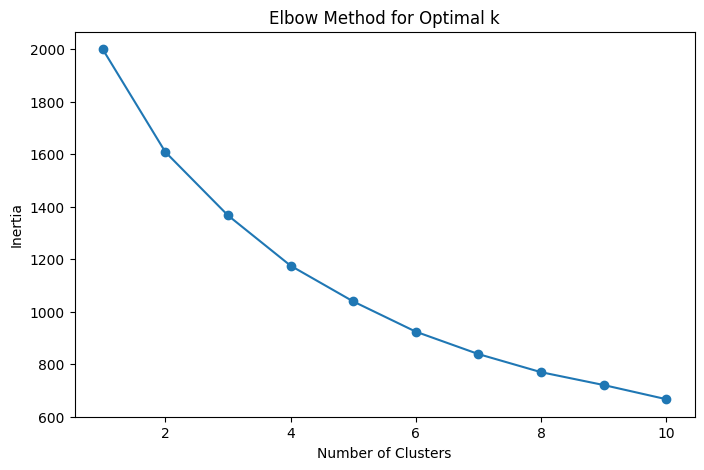

In [10]:
# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

The goal is to identify a point where adding more clusters does not significantly reduce inertia(sum of squared distances of points to their closest cluster center), this is known as the elbow point.

Since the elbow point(The point where the rate of decrease sharply slows down) is 2.

In [11]:
# Applying K-Means with k=2 (Aggressive vs. Eco Driving)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [12]:
# Assign labels
def label_cluster(cluster):
    if cluster == 0:
        return "Eco Driving"
    else:
        return "Aggressive Driving"

df['Driving_Style'] = df['Cluster'].apply(label_cluster)

In [13]:
# Save the clustered data
df.to_csv("clustered_obd2_data.csv", index=False)

# Show sample results
print(df[['RPM', 'Speed_kmh', 'Intake_Pressure_kPa', 'Fuel_Level_Percent', 'Driving_Style']].head())

    RPM  Speed_kmh  Intake_Pressure_kPa  Fuel_Level_Percent  \
0  2206         64                   61                  16   
1   822         52                   47                  19   
2  2360        125                   48                  81   
3  2033        125                   40                  86   
4   805         89                   30                  12   

        Driving_Style  
0  Aggressive Driving  
1  Aggressive Driving  
2         Eco Driving  
3         Eco Driving  
4         Eco Driving  


In [15]:
df['Driving_Style'].value_counts()

,count
Driving_Style,
Eco Driving,255
Aggressive Driving,245


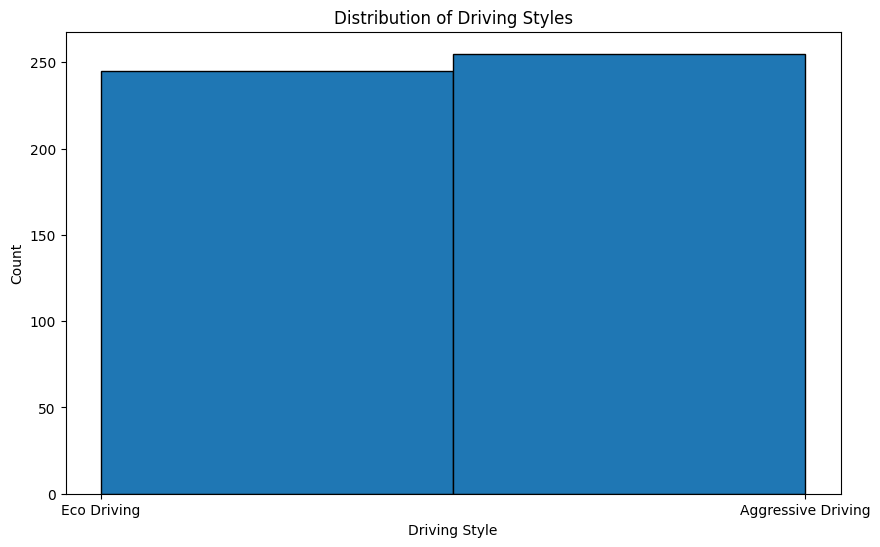

In [14]:
# prompt: plot the Driving_Style

import pandas as pd
import matplotlib.pyplot as plt

# Load the clustered data
df = pd.read_csv("clustered_obd2_data.csv")

# Plot the Driving Style
plt.figure(figsize=(10, 6))
plt.hist(df['Driving_Style'], bins=2, edgecolor='black')
plt.xlabel('Driving Style')
plt.ylabel('Count')
plt.title('Distribution of Driving Styles')
plt.xticks([0, 1], ['Eco Driving', 'Aggressive Driving'])  # Set custom x-axis labels
plt.show()
